In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('train.csv')

In [5]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
print(df.tail())

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


In [7]:
embarked_values = df['Embarked'].unique()
print(embarked_values)

['S' 'C' 'Q' nan]


In [8]:
embarked_mapping = {
    'S': 'Southampton, England',
    'C': 'Cherbourg, France',
    'Q': 'Queenstownmake , Ireland',
    'nan': 'NaN'
}

# Replace the Embarked column values with the country names
df['Embarked'] = df['Embarked'].map(embarked_mapping)

# Print the updated DataFrame
print(df[['PassengerId', 'Embarked']])

     PassengerId                  Embarked
0              1      Southampton, England
1              2         Cherbourg, France
2              3      Southampton, England
3              4      Southampton, England
4              5      Southampton, England
..           ...                       ...
886          887      Southampton, England
887          888      Southampton, England
888          889      Southampton, England
889          890         Cherbourg, France
890          891  Queenstownmake , Ireland

[891 rows x 2 columns]


In [9]:
df['FamilySize'] = df['SibSp'] + df['Parch']

In [10]:
print(df[['PassengerId','FamilySize']])

     PassengerId  FamilySize
0              1           1
1              2           1
2              3           0
3              4           1
4              5           0
..           ...         ...
886          887           0
887          888           0
888          889           3
889          890           0
890          891           0

[891 rows x 2 columns]


In [11]:
df['Fare'] = df['Fare'].round(1)

In [12]:
print(df[['Fare']].head())

   Fare
0   7.2
1  71.3
2   7.9
3  53.1
4   8.0


In [13]:
df = df.drop(columns=['SibSp', 'Parch'])


In [14]:
print(df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   
5                                   Moran, Mr. James    male   NaN   
6                            McCarthy, Mr. Timothy J    male  54.0   
7                     Palsson, Master. Gost

In [15]:
df.rename(columns={"Pclass": "Passenger Class"}, inplace=True)

In [16]:
print(df.head())

   PassengerId  Survived  Passenger Class  \
0            1         0                3   
1            2         1                1   
2            3         1                3   
3            4         1                1   
4            5         0                3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

             Ticket  Fare Cabin              Embarked  FamilySize  
0         A/5 21171   7.2   NaN  Southampton, England           1  
1          PC 17599  71.3   C85     Cherbourg, France           1  
2  STON/O2. 3101282   7.9   NaN  Southampton, England           0  
3            113803  53.1  C123  Sou

In [18]:
# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('Southampton, England')


# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'Southampton, England': 0, 'Cherbourg, France': 1, 'Queenstown, Ireland': 2})

# Define features and target
X = df[['Passenger Class', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
y = df['Survived']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Create and train the decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [21]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       105
           1       0.60      0.47      0.53        74

    accuracy                           0.65       179
   macro avg       0.64      0.63      0.63       179
weighted avg       0.65      0.65      0.64       179



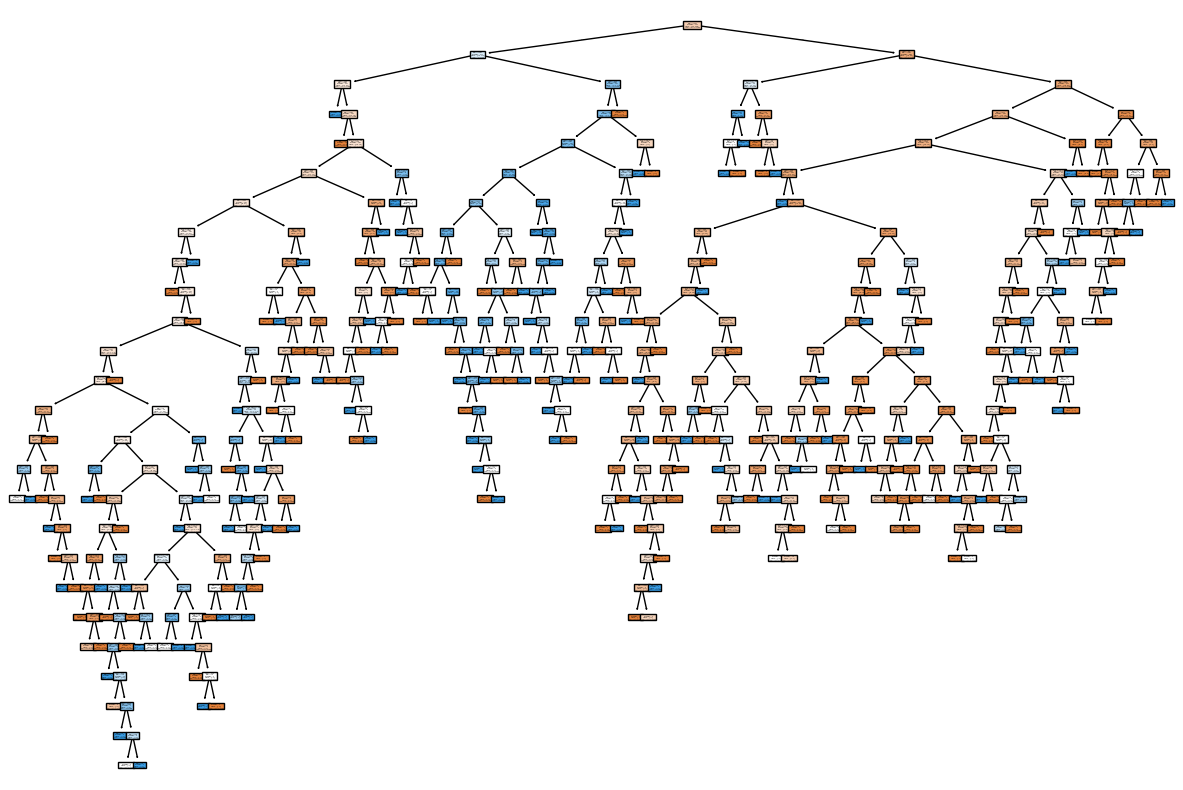

In [22]:
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


In [25]:
numeric_cols = df.select_dtypes(include=['number']).columns

# Fill missing values in numeric columns with the mean of each column
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

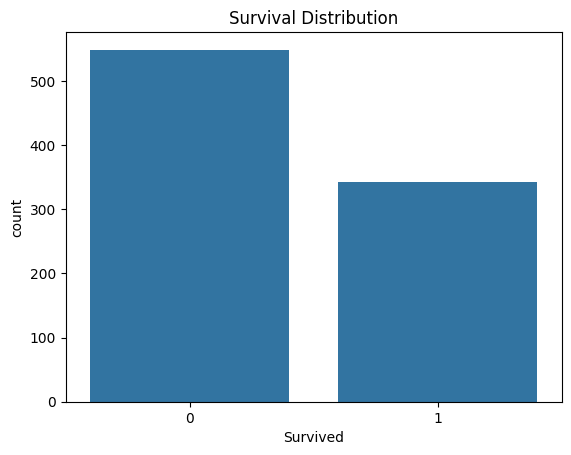

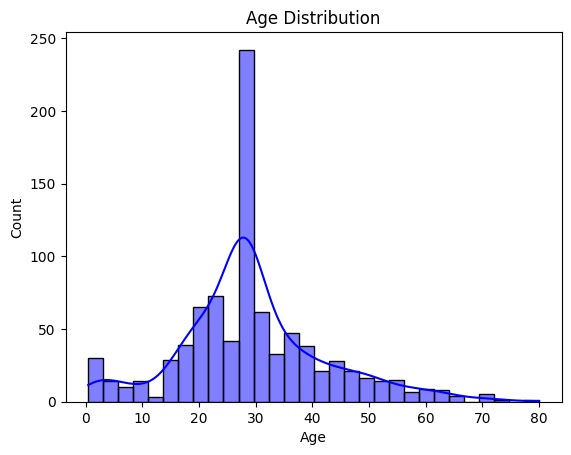

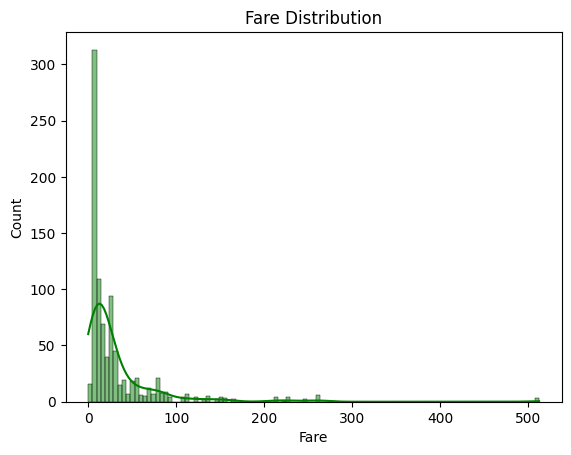

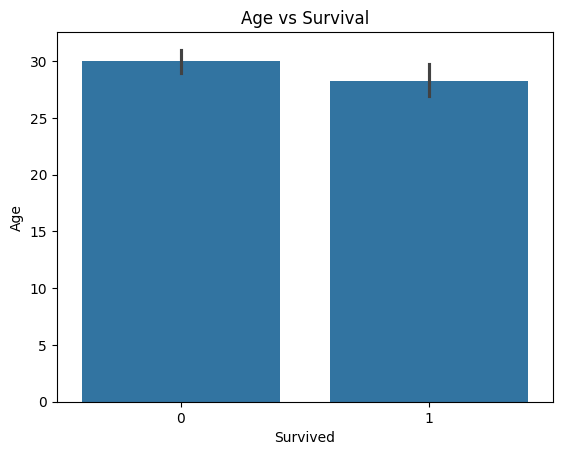

In [26]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

# Visualize the distribution of numerical features
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

sns.histplot(df['Fare'], kde=True, color='green')
plt.title('Fare Distribution')
plt.show()

# Visualize the relationship between 'Survived' and other features
sns.barplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()
